In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Bank%20Marketing%20Data%20Set%20%F0%9F%8F%A6/bank_marketing_dataset.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["subscribed"] = le.fit_transform(data["subscribed"])
y = data["subscribed"]
data.drop("subscribed", axis=1, inplace=True)
encoded_data = pd.get_dummies(data)
encoded_data.tail()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41187,74,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,1,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=0)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda>0.5, 1, 0)
from sklearn.metrics import confusion_matrix, roc_curve, auc
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[7017,  302],
       [ 417,  502]])

In [6]:
false_positive_rate, true_positive_rate, threshold_rate = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

0.7524917259637407

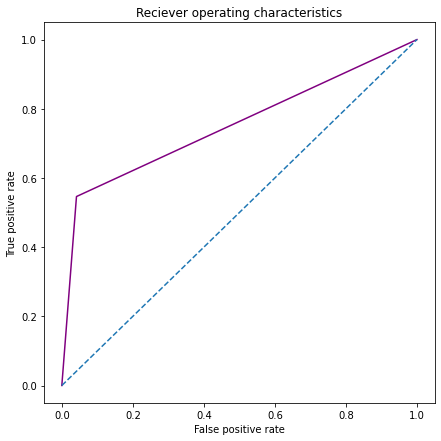

In [7]:
def plot_roc(roc_curve):
    plt.figure(figsize=(7,7))
    plt.title("Reciever operating characteristics")
    plt.plot(false_positive_rate, true_positive_rate, color="purple")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
import matplotlib.pyplot as plt
plot_roc(roc_auc_lda)